# Сериализация



Сериализация — процесс перевода структуры данных в последовательность байтов. Обратной к операции сериализации является операция десериализации — создание структуры данных из битовой последовательности. Сериализация используется для передачи объектов по сети и для сохранения их в файлы.

Python поддерживает все основные форматы сериализации Json, Yaml, XML, бинарные файлы


## Json

JSON (JavaScript Object Notation) - простой формат обмена данными, основанный на подмножестве синтаксиса JavaScript. Модуль json позволяет кодировать и декодировать данные в удобном формате.

Для работы с Json необходимо подключить одноименную библиотеку `import json`

###Запись


#### **`dump`**
Для записи данных в файл используется метод `dump`:

In [ ]:
dict_j = {'people': [{'name': 'Sam', 'age': 50}, {'name': 'Tim', 'age': None}]}

with open('j.json', 'w') as file:
    print(dict_j)
    json.dump(dict_j, file, indent=4)

{'people': [{'name': 'Sam', 'age': 50}, {'name': 'Tim', 'age': None}]}


Метод `json.dump()`:
* `dict_j` - словарь с данными 
* `file` - переменная хранящая в себе открытый файл 
* `indent` - количество пробелов(отступов) в файле

На выходе получим файл с расширением  .json который можно редактировать

#### **`dumps`**
Метод обратный методу loads. Преобразует Python словарь в json строку. 




In [ ]:
dictation = {'something': 'something', 'bool': None}
string = json.dumps(dictation)
print(string)

{"something": "something", "bool": null}


###Чтение

#### **`load`**
Для загрузки данных из файла,  используется метод `load`:

In [ ]:
import json

with open('j.json', 'r', encoding="utf-8") as file:
  dict_j = json.load(file)
  print(dict_j)


{'people': [{'name': 'Sam', 'age': 50}, {'name': 'Tim', 'age': None}]}


Метод `json.load()`:

*   `file` - переменная хранящая в себе открытый файл 

На выходе получаем обычный Python словарь `dict`.





#### **`loads`**

Для загрузки данных из строки, используется метод `loads`:

In [ ]:
string = """{"something": "something", "bool": null}"""
dictation  = json.loads(string)
print(dictation)

{'something': 'something', 'bool': None}


Метод `json.loads()`:


*   `string` -  строка в формате json 

На выходе получаем обычный Python словарь `dict`. 


### Кодировщики и декодировщики
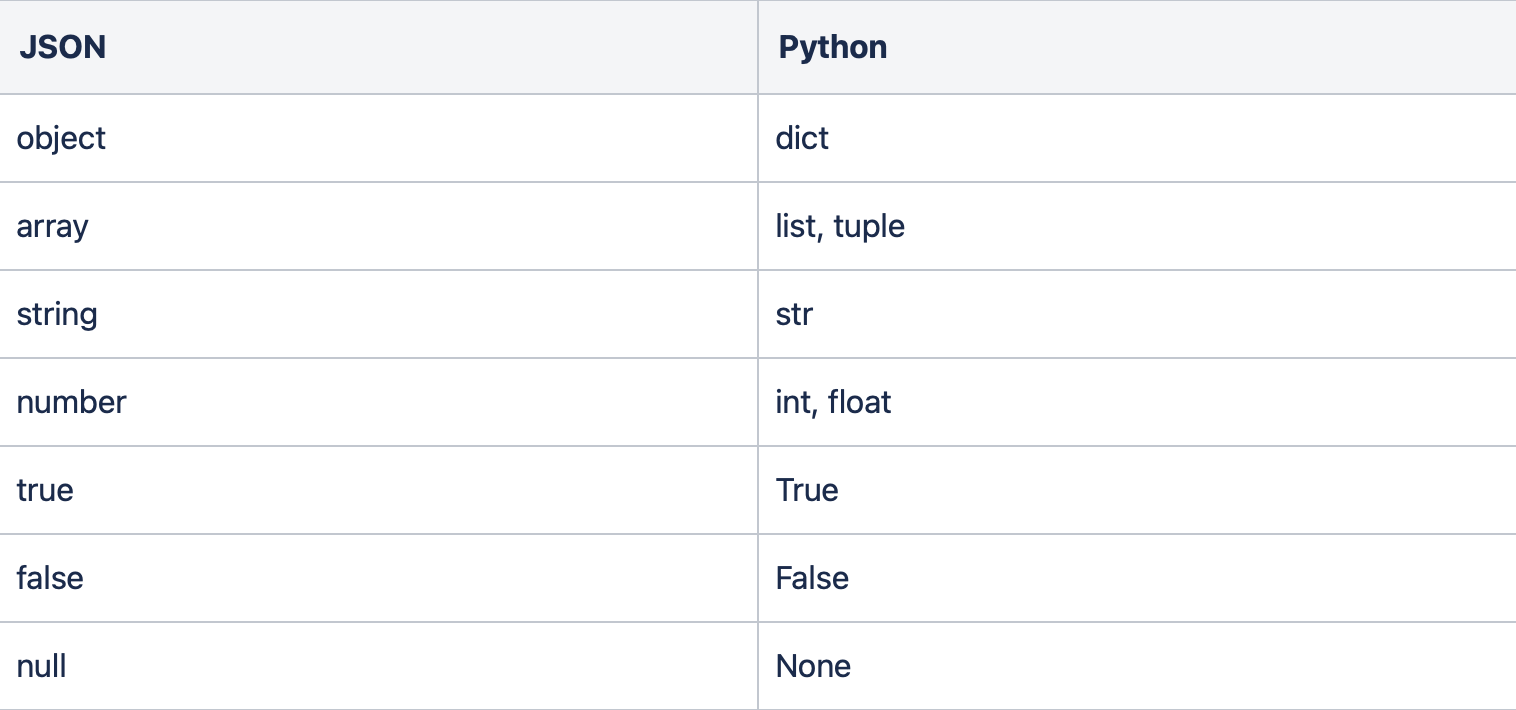

### Синтаксис Json


```
{
 "people": [
    {
      "name": "Bob",
      "age": 30
    },
    {
      "name": "Tim",
      "age": 12
    }
  ]
}
```


Json файл представляет собой словарь в который записывается:


{Ключ: значение}


* Ключ:
 * число `123`
 * строка `'qwerty'`
 
* Значение 
 * список `[]`
 * словарь `{}`
 * число `123`
 * строка `'qwerty'`
 * и тд 



##YAML
YAML — это язык для сериализации данных, который отличается простым синтаксисом и позволяет хранить сложноорганизованные данные в компактном и читаемом формате.

Для работы с yaml необходимо установить пакет `pip install pyyaml` и подключить библиотеку `import yaml`. 

In [ ]:
!pip install pyyaml


### Запись


#### **`dump`**
Для записи данных в файл используется метод `dump`:

In [ ]:
dict_y = {'hot-dog': {'bread': '3 шт', 'chesse': '340 гр', 'sausage': '3 шт', 'text': '1. нарезать  2. собрать во едино'}}

with open('y1.yaml', 'w') as file:
    print(dict_y)
    yaml.dump(dict_y, file, allow_unicode=True)

{'hot-dog': {'bread': '3 шт', 'chesse': '340 гр', 'sausage': '3 шт', 'text': '1. нарезать  2. собрать во едино'}}


Метод `yaml.dump()`:
* `dict` - словарь с данными который 
* `file` - переменная хранящая в себе открытый файл 
* `allow_unicode` - поддрежка кодировок (по умолчанию `False`)

На выходе получим файл с расширением  .yaml который можно редактировать

Так же можно сохранять в один файл несколько независимых документов. 
#### **`dump_all`**

Для записи в один нескольких документов в файл используется метод `dump_all`:

In [ ]:

list_y = ['12', None, 14.0, True]

with open('y2.yaml', 'w') as file:
    print(list_y)
    yaml.dump_all(list_y, file)

['12', None, 14.0, True]


Метод `yaml.dump_all()`:
* `list_y` - где каждый элемент новый документ
* `file` - переменная хранящая в себе открытый файл 

На выходе получим файл с расширением  .yaml который можно редактировать

###Чтение




#### **`load`**

Для загрузки данных из файла,  используется метод `load`:



In [ ]:

import yaml
from yaml import Loader

with open('y1.yaml', 'r', encoding="utf-8") as file:
    dict_y = yaml.load(file, Loader=Loader)
    print(dict_y)

{'hot-dog': {'bread': '3 шт', 'chesse': '340 гр', 'sausage': '3 шт', 'text': '1. нарезать  2. собрать во едино'}}


Метод `yaml.load()`:
* file - переменная хранящая в себе открытый файл 
* Loader - парсер

На выходе получаем обычный Python словарь dict. 



#### **`load_all`**
Yaml позволяет в одном файле хранить множество различных независимых документов. Разделяя их `---` для загрузки сразу всех. Используется метод `load_all`


In [ ]:
class Hero:
    def __init__(self, name=None, age=12):

        self.name = name
        self.age = age

    def __str__(self):
        return "%s(name=%s, age=%s)" % (self.__class__.__name__, self.name, self.age)

with open('y.yaml', 'r', encoding="utf-8") as file:
    iterator = yaml.load_all(file, Loader=Loader)
    for _ in iterator:
      print(_)
   

12
None
14.0
True


Метод `yaml.load_all()`:
* `file` - переменная хранящая в себе открытый файл 
* `Loader` - парсер

На выходе получаем объект итератор iterator 

###Синтаксис Yaml



```
---
pizza1: &pizza  
  cheese: &cheese 120 гр
  tomato: 1 штука
  pepperoni: 100 гр
  text: |
    1. нарезать
    2. собрать во едино
    3. запечь
hot-dog:
  chesse: *cheese  
  sausage: 1 шт
  bread: 1 ш
  text: > 
    1. нарезать
    2. собрать во едино
pizza2:
  <<: *pizza  
  tomato: 2 шт
  olives: 30 гр
---
- !!python/object:__main__.Hero
  age:  30
  name: Bob
-
  - !!str 12
  - ~
  - !!float 14
  - !!bool yes

```

Yaml представляет из себя словарь в котором записывается все как `ключ: значение`, но в отличии от json не надо использовать `{}`. В yaml как и в python очень важна табуляция. Все что под ключом с одинаковы отступом относится к этому ключу. 


* `---`  разделения данных 
* `&имя`  создания ссылка на данный элемент
* `*имя`  получения информации по ссылке(наследоваться от основного элемента)
* `<<: *имя`  получение информации по ссылке  для дальнейшего изменение/дополнения элемента
* Массив задается так же отступами и перед каждым элементом массива ставится `-`
* `!!` или `!` строка которую можно развернуть как URL или URI
 * `!!str`
 * `!!int`
 * `!!float`
 * `!!bool` 
   * `yes` или `true` - True
   * `no` или `false` - False
 * `~` или `null` - None
 * `!!python/object:__main__.Hero` так же можно указывать пользовательский тип данных
* Текст
 * `|` Отдельные строки. В конце каждой строки будет `\n`
 * `>` В конце всего блока текста будет `\n`  
 * Если не использовать флаги текст будет в одну строку(с сохранением пробелов)




*Обратите внимание, что YAML позволяет  создать произвольный объект Python это может быть опасно, если вы получаете документ YAML из ненадежного источника, например из Интернета. Метод yaml.safe_load и yaml.safe_load_all ограничивают эту возможность простыми объектами Python, такими как целые числа или списки*

*Так же yaml поддерживает чтение и запись в формате json.* 

*Для записи необходимо указать позиционный аргумент yaml.dump(обьект, файл, default_flow_style=True)*

## XML

XML (расширяемый язык разметки) — это язык программирования, который состоит из объявлений в виде информации и определяющих тегов. С его помощью удобно хранить и передавать любые данные. Язык не зависит от операционной системы и среды обработки.

### Запись

Для сохранения в файла используется модуль `dom.minidom`, для работы необходимо его импортировтаь `import xml.dom.minidom`

In [ ]:
import xml.dom.minidom

data_xml= [{'name': 'Bob', 'group': '111'}, {'name': 'Tim', 'group': '222'}, {'name': 'Sam', 'group': '333'}]

class DomWriter:
    def __init__(self, file_name) -> None:
        self.file_name = file_name
        self.domtree = xml.dom.minidom.Document()

    def create_xml_file(self, data):
        pass_table = self.domtree.createElement("pass_table")

        for student_data in data:
            student = self.domtree.createElement("student")
            for value in student_data:
                temp_child = self.domtree.createElement(value)
                student.appendChild(temp_child)

                node_text = self.domtree.createTextNode(student_data[value].strip())
                temp_child.appendChild(node_text)

            pass_table.appendChild(student)

        self.domtree.appendChild(pass_table)

        self.domtree.writexml(open(self.file_name, 'w'),
                              indent="  ",
                              addindent="  ",
                              newl='\n')
        self.domtree.unlink()

wri = DomWriter('x.xml')
print(data_xml)
wri.create_xml_file(data_xml)

[{'name': 'Bob', 'group': '111'}, {'name': 'Tim', 'group': '222'}, {'name': 'Sam', 'group': '333'}]


Класс `DomWriter`
* `self.domtree` - Объект, представляющий весь документ


---
Метод `Document.createElement(tagName)` 

Создание и возвращает нового узла элемента. Элемент не вставляется в документ при его создании. Необходимо явно вставить его с помощью одного из других методов, таких как `insertBefore()` или `appendChild()`.


---


Метод `Document.createTextNode(data)`

Создать и вернуть текстовый узел, содержащий данные, переданные в качестве параметра. Как и в случае других методов создания, этот метод не позволяет вставить узел в дерево.


---


Метод `Node.appendChild(newChild)`

Добавить новый дочерний узел к этому узлу в конце списка дочерних узлов, возвращая newChild. Если узел уже был в дереве, он удаляется первым.


---


Метод `Node.writexml(writer, indent="", addindent="", newl="")`

Запись XML в объект записи. Устройство записи получает тексты, но не байты в качестве входных данных, оно должно иметь метод `write()`, который соответствует методу интерфейса файлового объекта. Параметр `indent` является отступом текущего узла. Параметр `addindent` является инкрементным отступом, используемым для подузлов текущего. Параметр `newl` определяет строка, используемый для завершения новых линий.

Для узла Document можно используемый дополнительный аргумент ключевой `encoding`, чтобы указать поле кодировка заголовка XML.


---


Метод `Node.unlink()`

Разорвать внутренние ссылки в DOM, чтобы он был мусором, собранным в версиях Python без циклического GC. Даже когда циклический GC доступен, использование этого может сделать большие объемы памяти доступными раньше, поэтому вызов этого для объектов DOM, как только они больше не нужны, является хорошей практикой. Это должно быть вызвано только для объекта Document, но может быть вызвано дочерними узлами для удаления дочерних узлов этого узла.





### Чтение

Для загрузки из файла используется модуль `sax`, для работы необходимо его импортировтаь `import xml.sax`

In [ ]:
import xml.sax

class SaxReader(xml.sax.ContentHandler):
    def __init__(self) -> None:
        super().__init__()
        self.table_datas = []
        self.student_data = {}

    def startElement(self, name, attrs):
        self.current = name

    def characters(self, content):
        if self.current == "name":
            self.name = content
        elif self.current == "group":
            self.group = content


    def endElement(self, name):
        if self.current == "name":
            self.student_data["name"] = (self.name)
        elif self.current == "group":
            self.student_data["group"] = (self.group)


        if len(self.student_data) == 2:
            self.table_datas.append(self.student_data)
            self.student_data = {}

        self.current = ""

handler = SaxReader()
parser = xml.sax.make_parser()
parser.setContentHandler(handler)
parser.parse('x.xml')
print(handler.table_datas)

[{'name': 'Bob', 'group': '11111'}, {'name': 'Tim', 'group': '222'}, {'name': 'Sam', 'group': '333'}]


Класс `SaxReader`
* self.table_datas = [] - данные из документа 
* self.student_data = {} - один студент 

Функция `startElement`  
*   `name` - имя узла
*   `attrs` -  атрибуты узла 

Сигнализирует о запуске элемента в режиме, отличном от пространства имен.

Параметр name содержит исходное имя XML 1.0 типа элемента в качестве строка, а параметр attrs содержит объект интерфейса Attributes, содержащий атрибуты элемента. Объект, переданный как attrs, может быть re-используемый парсер; сохранение ссылки на нее не является надежным способом хранения копии атрибуты. Чтобы сохранить копию атрибуты, используйте метод `copy()` объекта attrs.


---

Функции `characters` 

* `content` - сожержимое узла

Получение уведомления о символе данных.

Анализатор вызовет этот метод, чтобы сообщить о каждом чанк символ данных. SAX парсерами может возвращает все смежные символ данные в одном чанк или они могут разделить их на несколько чанки; однако все символы в любом отдельном событии должны исходить от одного и того же внешнего объекта, чтобы локатор предоставлял полезную информацию.

content может быть строка или сущность байтов; модуль считывателя expat всегда производит строки.

---



Функция `endElement`. 

Сигнализирует об окончании элемента в режиме, отличном от пространства имен.

Параметр name содержит имя типа элемента, как и событие `startElement()`.




---


Метод `ContentHandler.setDocumentLocator(locator)`

Вызывается парсер, чтобы дать приложению локатор для определения происхождения событий документа.

парсерами SAX настоятельно рекомендуется (хотя и не обязательно) предоставить локатор: если он это делает, он должен предоставить локатор приложению путем вызова этого метода перед вызовом любого из других методов в интерфейсе DocumentHandler.

Локатор позволяет приложению определить конечную позицию любого события, связанного с документом, даже если парсер не сообщает об ошибке. Обычно приложение использует эту информацию для сообщения о собственных ошибках (например, символ содержимом, которое не соответствует бизнес-правилам приложения). Информация, возвращенный локатором, вероятно, недостаточна для использования с поисковой системой.

Обратите внимание, что локатор будет возвращает корректную информацию только во время вызова событий в этом интерфейсе. Приложение не должно пытаться использовать его в любое другое время.





### Синтаксис XML


```
<?xml version="1.0" ?>
  <pass_table>
    <student>
      <name>Bob</name>
      <group>111</group>
    </student>
    <student>
      <name>Tim</name>
      <group>222</group>
    </student>
    <student>
      <name>Sam</name>
      <group>333</group>
    </student>
  </pass_table>
  
  ```
  Файл представляет собой дерево

  * Все XML элементы должны иметь закрывающий тег 

  `<p>Это параграф.</p>`

  * Теги XML регистрозависимы

  ` <Message>Это неправильно</message>`

  `<message>Это правильно</message>`

  * XML элементы должны соблюдать корректную вложенность

  `<b><i>Это неправильно</b></i>`

  `<b><i>Это правильно</i></b>`

  * У XML документа должен быть корневой элемент

```
<корневой>
   <потомок>
      <подпотомок>.....</подпотомок>
   </потомок>
</корневой>
```

* XML пролог

```
<?xml version="1.0" encoding="UTF-8"?>
```
XML пролог необязателен. Но если он есть, то это должна быть первая строка XML документа.

В XML документе могут присутствовать международные символы, вроде русских букв, и чтобы не возникало ошибок необходимо указать кодировку, либо сохранить XML файл в формате UTF-8.

UTF-8 — кодировка XML документов по умолчанию.

* Значения XML атрибутов должны заключаться в кавычки


```
<note date=12/11/2007>
   <to>Это неправильно</to>
</note>

<note date="12/11/2007">
   <to>Это правильно</to>
</note>
```
* Сущности 

Некоторые символы в XML имеют особые значения.

Если вы поместите, например, символ "<" внутри XML элемента, то будет сгенерирована ошибка, так как парсер интерпретирует его, как начало нового элемента.

`<message>если жалование < 1000</message>` - ошибка

`<message>если жалование &lt; 1000</message>` - нет ошибки

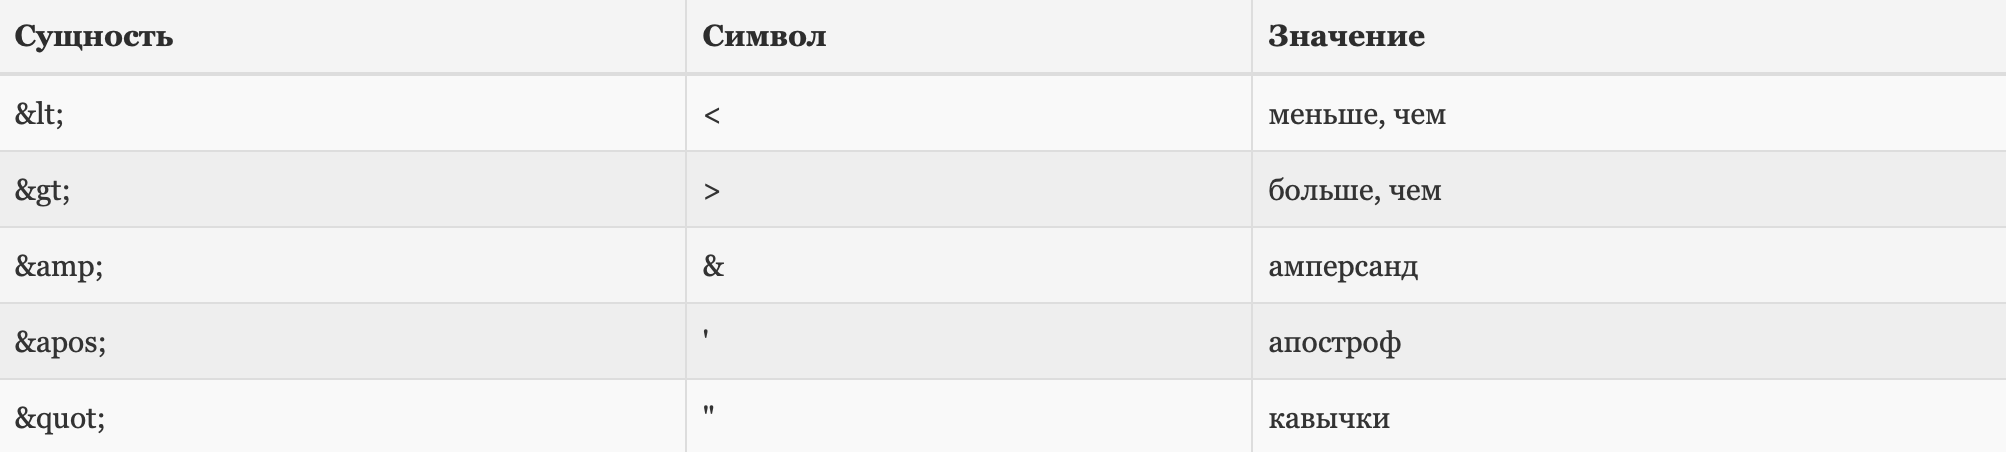















## Бинарник

###Pickle
Модуль pickle реализует мощный алгоритм сериализации и десериализации объектов Python. "Pickling" - процесс преобразования объекта Python в поток байтов, а "unpickling" - обратная операция, в результате которой поток байтов преобразуется обратно в Python-объект. Так как поток байтов легко можно записать в файл, модуль pickle широко применяется для сохранения и загрузки сложных объектов в Python.

####Запись

##### **`dump`**
Для записи данных в файл используется метод `dump`:

In [ ]:
data = {
    'a': [1, 2.0, 3, 4+6j],
    'b': ("character string", b"byte string"),
    'c': {None, True, False}
}


with open('p.bin', 'wb') as file:
    pickle.dump(data, file)

Метод `pickle.dump()`:
* `dict_b` - словарь с данными(может быть что угодно)
* `file` - переменная хранящая в себе открытый файл(wb - для записи в двоичном коде)

На выходе получим файл с расширением  .bin

##### **`dumps`** 
Метод `dumps` возвращает сериализованый обьект
 




In [ ]:
class Foo:
    attr = 'A class attribute'

picklestring = pickle.dumps(Foo)
print(picklestring)
print(Foo.attr)

b'\x80\x03c__main__\nFoo\nq\x00.'
A class attribute


####Чтение


##### **`load`**

Для загрузки данных из файла,  используется метод `load`:

In [ ]:
import pickle

with open('p.bin', 'rb') as file:
    dict_b = pickle.load(file)
    print(dict_b)

{'a': [1, 2.0, 3, (4+6j)], 'b': ('character string', b'byte string'), 'c': {False, True, None}}


Метод `pickle.load()`:

*   `file` - переменная хранящая в себе открытый файл 

На выходе получаем то что записано в файле. Это может быть все что угодно словарь, список, класс или обьект класса. Поэтому важно помнить. 

Не загружайте с помощью модуля pickle файлы из ненадёжных источников. Это может привести к необратимым последствиям.

##### **`loads`**

Метод `loads` загружает объект из потока байт:

In [ ]:
new_foo = pickle.loads(picklestring)
print(new_foo)

foo = new_foo()
print(foo.attr)

<class '__main__.Foo'>
A class attribute


Метод `pickle.loads()`
* `picklestring` - байт строка 

### Struct

Модуль выполняет преобразования между Python значениями и C структурами, представленными как объекты Python bytes. Может использоваться для обработки двоичных данных, хранящихся в файлах или из сетевых подключений, а также из других источников. Он использует Строки формата в качестве компактного описания макета структур C и предполагаемого преобразования в/из значений Python.

 ##### **`pack`**
Возвращает байтовый объект, содержащий значения v1, v2, …, упакованные в соответствии со строкой формата format. Аргументы должны точно соответствовать значениям, требуемым форматом.

In [ ]:
import struct
pack = struct.pack('ii?', 100, 200, True)
print(pack)

b'd\x00\x00\x00\xc8\x00\x00\x00\x01'


 ##### **`unpack`**
Распаковать из буфера buffer (предположительно упакованного pack(format, ...)) в соответствии со строкой формата format. Результатом будет кортеж, даже если он содержит ровно один элемент. Размер буфера в байтах должен соответствовать размеру, требуемому форматом.

In [ ]:
print (struct.unpack('ii?', pack))

(100, 200, True)


####  Порядок байт и Форматные символы

По умолчанию типы C представлены в родном формате и порядке байтов компьютера, а также если это необходимо, выравниваются путём пропуска байтов набивки (pad) (в соответствии с правилами, используемыми C компилятором).

В качестве альтернативы, первый символ строки формата может использоваться для указания порядка байтов, размера и выравнивания упакованных данных в соответствии со следующей таблицей:

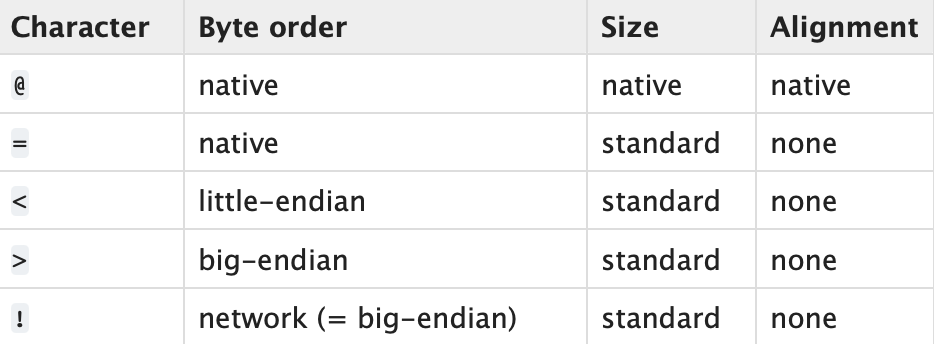

Если первый символ не является одним из них, предполагается '@'. 

Родной порядок байтов — big-endian (от старшего к младшему) или little-endian (от младшего к старшему) байтов, в зависимости от хост-системы. Например, у Intel x86 и AMD64 (x86-64) little-endian

Форматные символы выполняют преобразование между значениями C и Python очевидным образом, с учётом их типов. Столбец «Стандартный размер» относится к размеру упакованного значения в байтах при использовании стандартного размера; т. е., когда строка формата начинается с одного из '<', '>', '!' или '='. При использовании родного размера размер упакованного значения зависит от платформы.

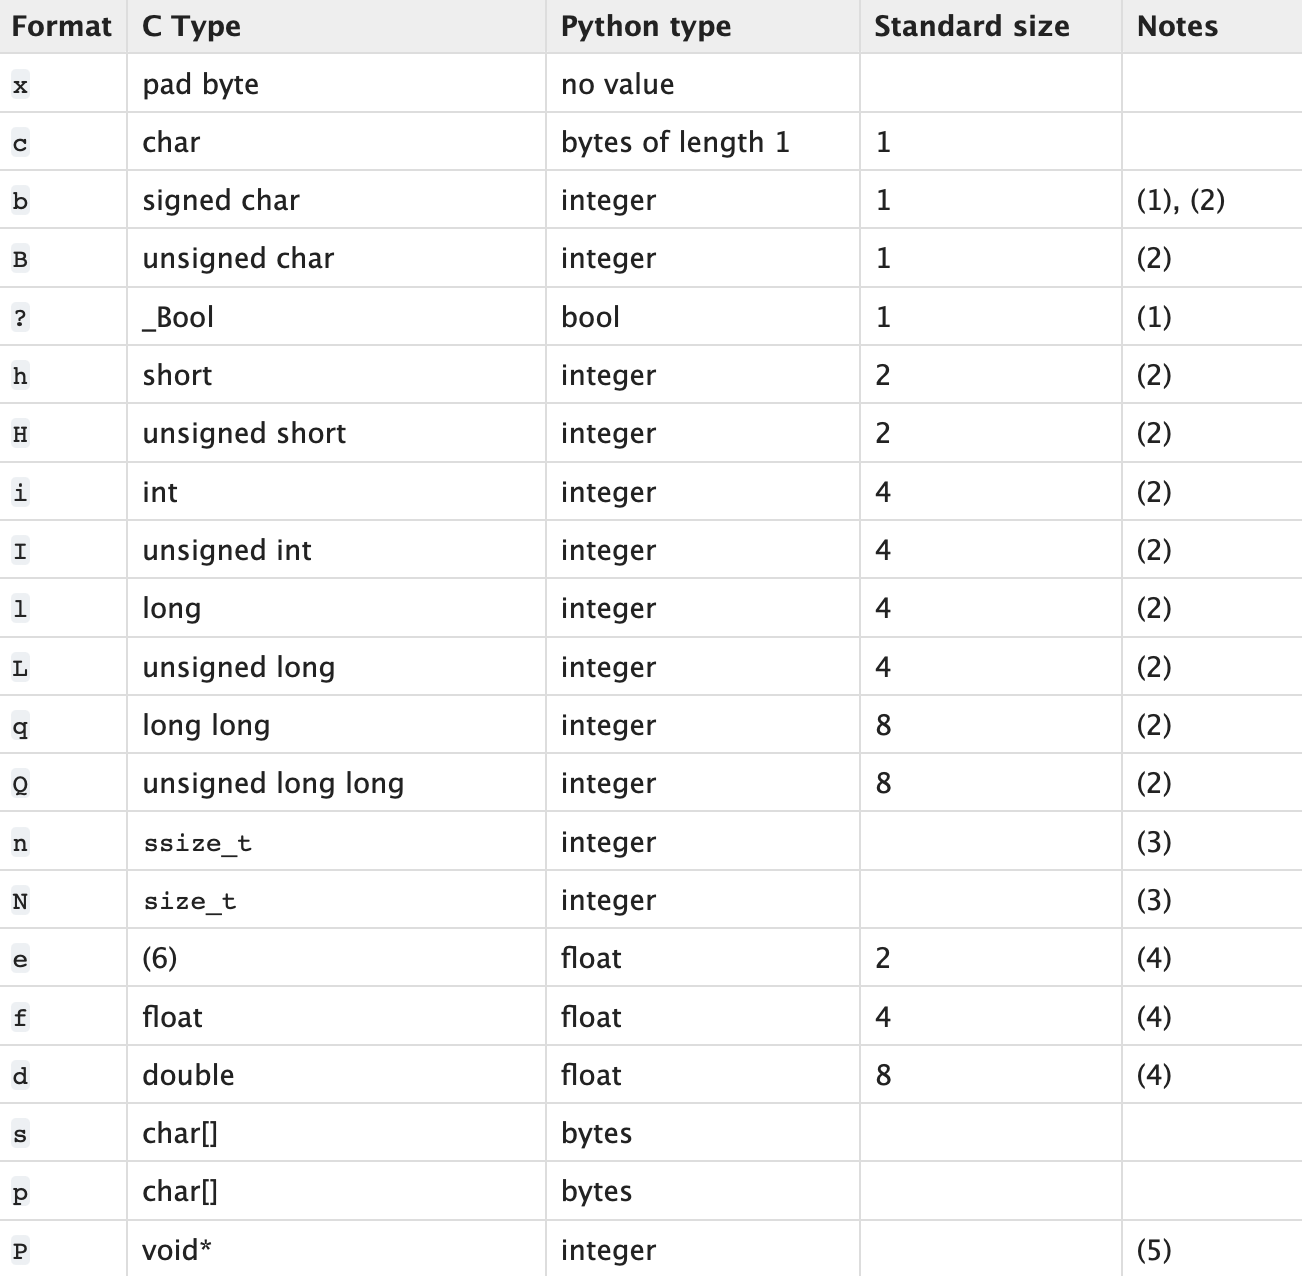

# Литература
*   https://digitology.tech/docs/python_3/library/xml.dom.html
*  https://digitology.tech/docs/python_3/library/xml.dom.minidom.html
* https://digitology.tech/docs/python_3/library/xml.sax.handler.html
* https://pyyaml.org/wiki/PyYAMLDocumentation
* https://docs.python.org/3/library/json.html
* https://docs.python.org/3/library/pickle.html#pickle.dumps
* https://docs.python.org/3/library/struct.html